In [2]:
import os
import csv
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [4]:
lines = []
dir_data = "data"

with open(os.path.join(os.getcwd(), dir_data, "driving_log.csv")) as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
lines = lines[1:]

images = []
measurements = []
for line in lines:
    source_path = os.path.split(line[0])[-1]
    current_path = os.path.join(os.getcwd(), dir_data, "IMG", source_path)
    image = cv2.imread(current_path)
    #g_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    images.append(image)
    measurement = float(line[3])
    measurements.append(measurement)

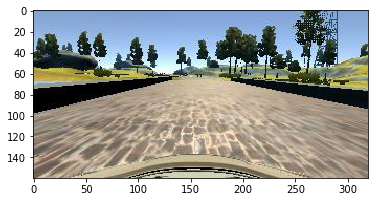

In [5]:
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
plt.show()

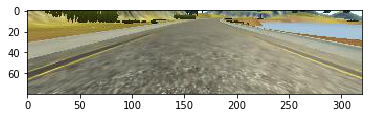

In [6]:
plt.imshow(cv2.cvtColor(images[1300][55:135,:], cv2.COLOR_BGR2RGB))
plt.show()

In [59]:
images[0].shape

(160, 320, 3)

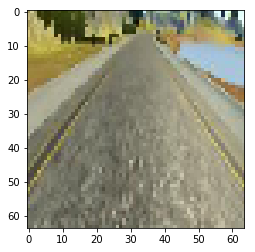

In [8]:
plt.imshow(cv2.cvtColor(cv2.resize(images[1300][55:135,:], (64,64)), cv2.COLOR_BGR2RGB))
plt.show()

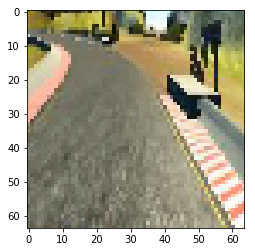

In [9]:
line = lines[2]
source_path = os.path.split(line[2])[-1]
current_path = os.path.join(os.getcwd(), dir_data, "IMG", source_path)
image = cv2.imread(current_path)
plt.imshow(cv2.cvtColor(cv2.resize(image[55:135,:], (64,64)), cv2.COLOR_BGR2RGB))
plt.show()

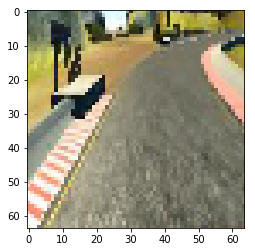

In [10]:
image = cv2.flip(image, 1)
plt.imshow(cv2.cvtColor(cv2.resize(image[55:135,:], (64,64)), cv2.COLOR_BGR2RGB))
plt.show()

In [35]:
def augment_brightness_camera_images(image):
    '''
    :param image: Input image
    :return: output image with reduced brightness
    '''

    # convert to HSV so that its easy to adjust brightness
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)

    # randomly generate the brightness reduction factor
    # Add a constant so that it prevents the image from being completely dark
    random_bright = .25+np.random.uniform()

    # Apply the brightness reduction to the V channel
    image1[:,:,2] = image1[:,:,2]*random_bright

    # convert to RBG again
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

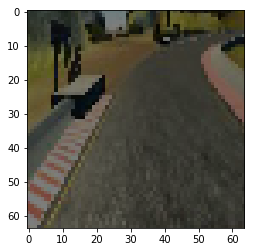

In [40]:
b_image = augment_brightness_camera_images(image)
plt.imshow(cv2.cvtColor(cv2.resize(b_image[55:135,:], (64,64)), cv2.COLOR_BGR2RGB))
plt.show()

In [75]:
lines = []
dir_data = "data"

with open(os.path.join(os.getcwd(), dir_data, "driving_log.csv")) as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
lines = lines[1:]

images = []
measurements = []
for line in lines:
    source_path = os.path.split(line[0])[-1]
    current_path = os.path.join(os.getcwd(), dir_data, "IMG", source_path)
    image = cv2.imread(current_path)
    #g_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    images.append(image)
    measurement = float(line[3])
    measurements.append(measurement)

/home/keigo/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


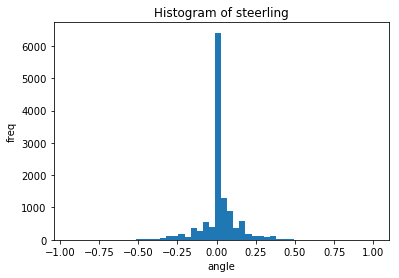

In [81]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(measurements, bins=50)
ax.set_title('Histogram of steerling')
ax.set_xlabel('angle')
ax.set_ylabel('freq')
fig.show()

In [80]:
np.bincount(measurements)

array([12437,     2])